In [1]:
import cv2
import common
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
import pylab
pylab.rcParams["figure.figsize"] = (10.0,8.0)

In [2]:
img = cv2.imread("Images/2.jpg") #open/read the image

In [3]:
print(img.dtype)

uint8


In [4]:
print(img.shape) #a tuple of row(height), columns(width), color channel

(750, 1000, 3)


In [6]:
height, width, color = img.shape
print("height", height)

height 750


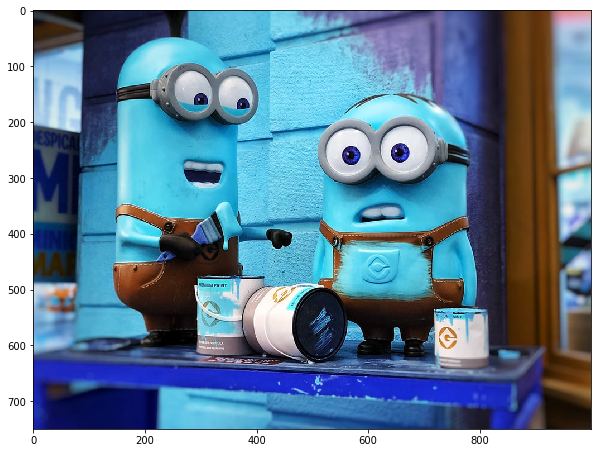

In [7]:
plt.imshow(img)

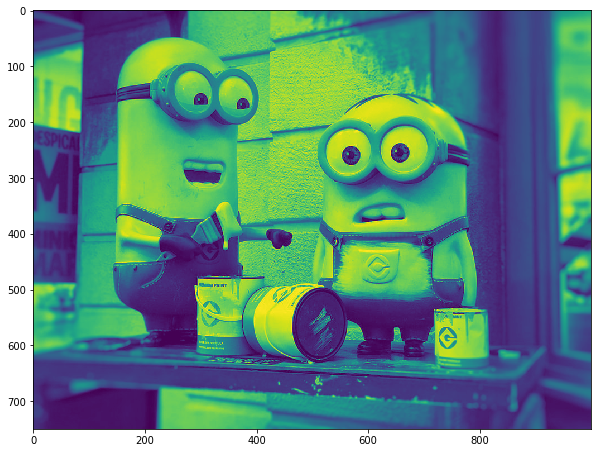

In [13]:
#BGR 
#color flags
#used to convert from one color space to another

b,g,r = cv2.split(img) #splitting color channels
plt.imshow(g)

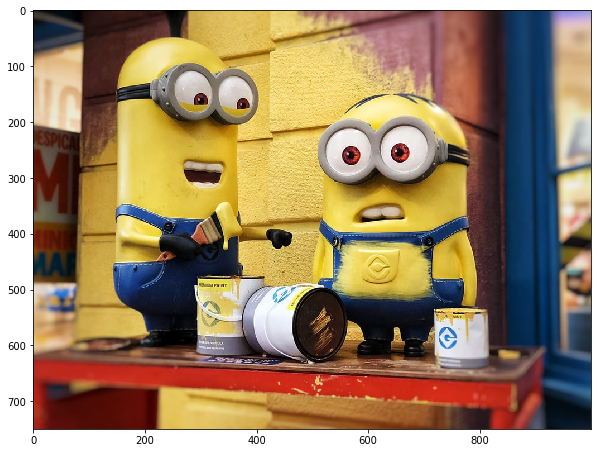

In [14]:
merged_img = cv2.merge([r,g,b])
plt.imshow(merged_img)

In [16]:
COLORflags = [flag for flag in dir(cv2) if flag.startswith("COLOR")]
print(len(COLORflags))
print(COLORflags)

295
['COLORMAP_AUTUMN', 'COLORMAP_BONE', 'COLORMAP_CIVIDIS', 'COLORMAP_COOL', 'COLORMAP_HOT', 'COLORMAP_HSV', 'COLORMAP_INFERNO', 'COLORMAP_JET', 'COLORMAP_MAGMA', 'COLORMAP_OCEAN', 'COLORMAP_PARULA', 'COLORMAP_PINK', 'COLORMAP_PLASMA', 'COLORMAP_RAINBOW', 'COLORMAP_SPRING', 'COLORMAP_SUMMER', 'COLORMAP_TURBO', 'COLORMAP_TWILIGHT', 'COLORMAP_TWILIGHT_SHIFTED', 'COLORMAP_VIRIDIS', 'COLORMAP_WINTER', 'COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COL

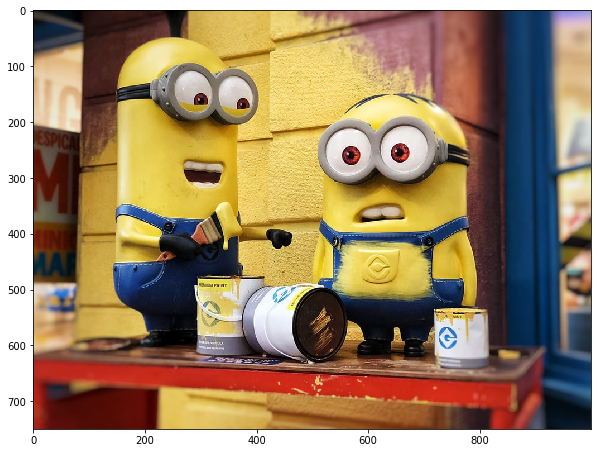

In [17]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [19]:
pixel = img[200,200]
print(pixel)
print(img[200,100])

[227 202  86]
[96 52 41]


In [20]:
img[200,100] = (0,255,0)
print(img[200,100])

[0 0 0]


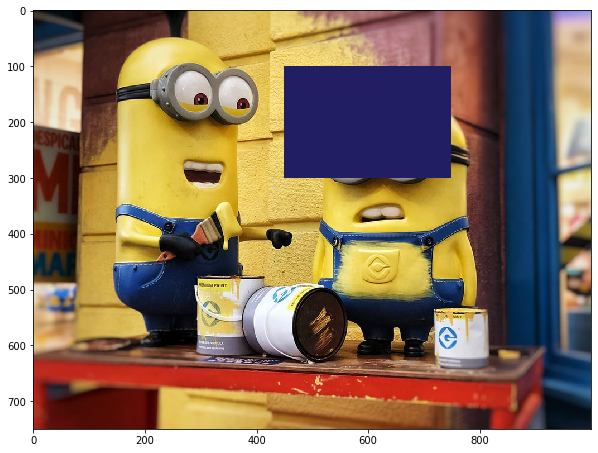

In [25]:
img[100:300, 450:750] = (34,30,100)

#top_y:bottom_y, left_x, right_x of the immages
plt.imshow(img)

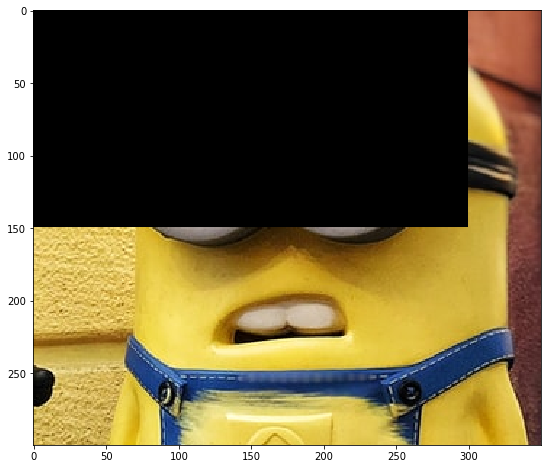

In [22]:
#Cropping images would work similarly
minion_face = img[150:450, 450:800]
plt.imshow(minion_face)

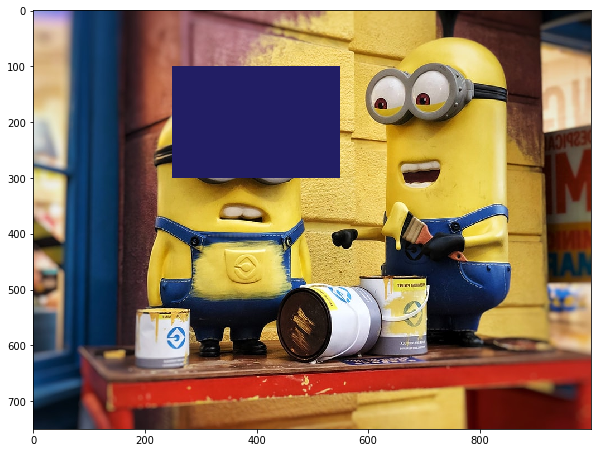

In [27]:
#some basic operations


#flip the image

flip_1 = cv2.flip(img, 1)
plt.imshow(flip_1)

In [34]:
img2 = cv2.imread("Images/2.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [35]:
#Add two images

blank_image = np.zeros((img2.shape),np.uint8)
blank_image[100:200,100:200,1]=100

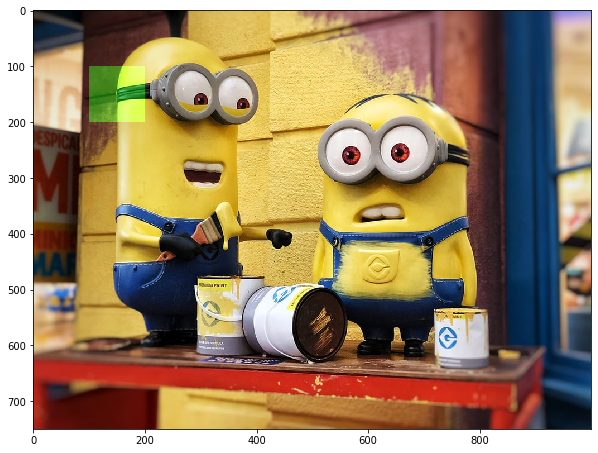

In [36]:
new_img = cv2.add(img2,blank_image)
plt.imshow(new_img)

In [37]:
#Gaussian blur


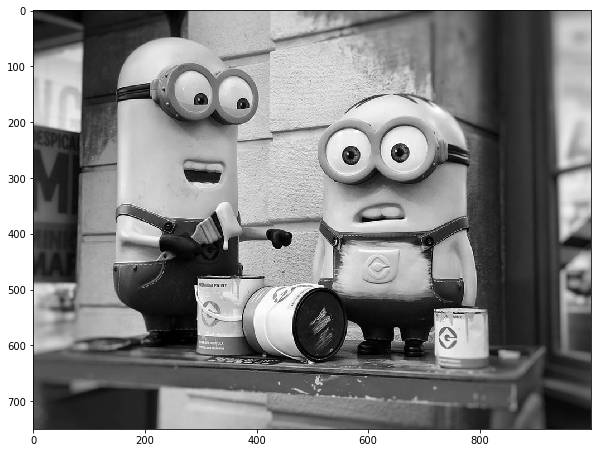

In [42]:
#1. convert into grayscale
sketch = cv2.imread("Images/2.jpg")

sketch_gray = cv2.cvtColor(sketch, cv2.COLOR_BGR2GRAY)
plt.imshow(sketch_gray,cmap="gray")

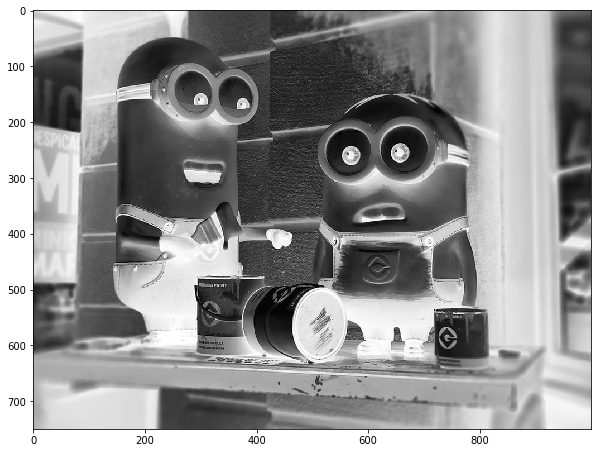

In [44]:
#2: Invert it

#img_invert = 255 - sketch_gray

img_invert = cv2.bitwise_not(sketch_gray)

plt.imshow(img_invert, cmap="gray")

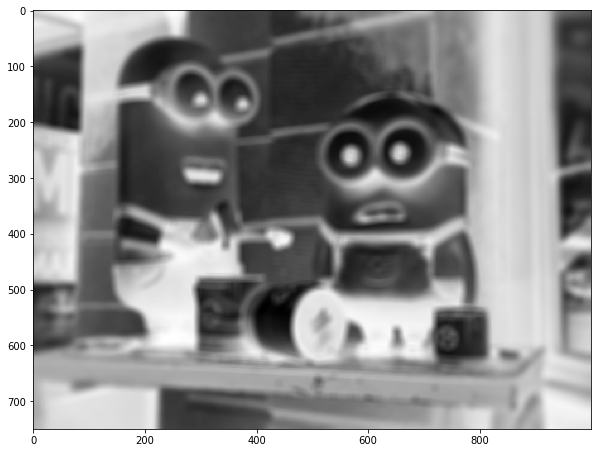

In [52]:
#3. Blurring this image using Gaussian blur

img_blur = cv2.GaussianBlur(img_invert, (15,15), 10)
plt.imshow(img_blur, cmap="gray")

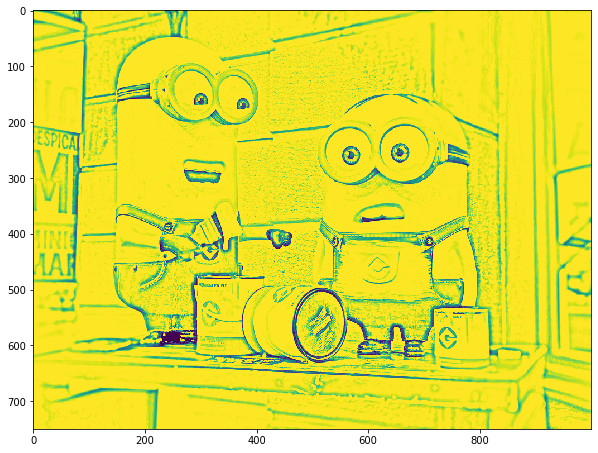

In [53]:
#step 4 - dodge and blend the inverted image and th3e grayscale image

def dodge(image,mask):
    return cv2.divide(image, 255-mask, scale=256)


sketchy_output = dodge(sketch_gray,img_blur)
plt.imshow(sketchy_output)